In [32]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [33]:
# Comment out appropriate portion
#tk = th.Thicket.from_caliperreader(glob("cali_files/*.cali"))
# tk = th.Thicket.from_caliperreader(glob("cali_files/Random/Strong_Scaling_MPI/*.cali"))
# tk = th.Thicket.from_caliperreader(glob("cali_files/MPI_Files/65536_Weak_Test/*.cali"))
# tk = th.Thicket.from_caliperreader(glob("cali_files/MPI_Files/16777216_Strong/*.cali"))

tk = th.Thicket.from_caliperreader(glob("CUDA-WeakScaling/*.cali"))

In [34]:
# Performance data
tk.dataframe
#CUDA
tk.dataframe = tk.dataframe.drop([('Min time/rank'),('Max time/rank'),('Total time'),("Avg time/rank"),("Min GPU time/rank"),("Max GPU time/rank"),("Total GPU time"), ('nid')], axis=1)


In [35]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
109539396,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t8-v4096.cali,1701906900,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./Sort, 8, 4096]",g,SampleSort,CUDA,float,4,4096,Random,8,2,24,Handwritten with some reference to AI
245923588,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t8-v4096.cali,1702025234,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./Sort, 8, 4096]",g,SampleSort,CUDA,float,4,4096,Reversesorted,8,2,24,Handwritten with some reference to AI
365165492,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v131072.cali,1702025275,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./Sort, 64, 131072]",g,SampleSort,CUDA,float,4,131072,Reversesorted,64,16,24,Handwritten with some reference to AI
403876650,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v131072.cali,1701907235,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./Sort, 64, 131072]",g,SampleSort,CUDA,float,4,131072,Random,64,16,24,Handwritten with some reference to AI
1102494298,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v131072.cali,1702024713,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./Sort, 64, 131072]",g,SampleSort,CUDA,float,4,131072,Sorted,64,16,24,Handwritten with some reference to AI
1263273452,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v131072.cali,1702024419,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./Sort, 64, 131072]",g,SampleSort,CUDA,float,4,131072,1%perturbed,64,16,24,Handwritten with some reference to AI
1291655913,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t32-v65536.cali,1702025265,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./Sort, 32, 65536]",g,SampleSort,CUDA,float,4,65536,Reversesorted,32,8,24,Handwritten with some reference to AI
1294575777,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t4-v1024.cali,1702025215,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./Sort, 4, 1024]",g,SampleSort,CUDA,float,4,1024,Reversesorted,4,1,24,Handwritten with some reference to AI
2176059567,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t16-v16384.cali,1702024691,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./Sort, 16, 16384]",g,SampleSort,CUDA,float,4,16384,Sorted,16,4,24,Handwritten with some reference to AI


In [36]:
tk.metadata
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.1

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  └─ 1.000 comm_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [37]:
# strong
# gb = tk.groupby([("InputSize"), ("InputType")])
# weak
gb = tk.groupby([("InputType")])

4  thickets created...
{('1%perturbed',): <thicket.thicket.Thicket object at 0x163268510>, ('Random',): <thicket.thicket.Thicket object at 0x1635e2a10>, ('Reversesorted',): <thicket.thicket.Thicket object at 0x15fbf3b90>, ('Sorted',): <thicket.thicket.Thicket object at 0x163509410>}


In [38]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [39]:
ctk.dataframe

(1%perturbed,)  \
                                                                spot.channel   
node                                              num_threads                  
{'name': 'main', 'type': 'function'}              4            regionprofile   
                                                  8            regionprofile   
                                                  16           regionprofile   
                                                  32           regionprofile   
                                                  64           regionprofile   
{'name': 'comm', 'type': 'function'}              4            regionprofile   
                                                  8            regionprofile   
                                                  16           regionprofile   
                                                  32           regionprofile   
                                                  64           regionprofile   
{'name': 'comm_large', 'type': 'function'}        4            regionprofile   
                                                  8            regionprofile   
                                                  16           regionprofile   
                                                  32           regionprofile   
                                                  64           regionprofile   
{'name': 'comm_small', 'type': 'function'}        4            regionprofile   
                                                  8            regionprofile   
                                                  16           regionprofile   
                                                  32           regionprofile   
                                                  64           regionprofile   
{'name': 'correctness_check', 'type': 'function'} 4            regionprofile   
                                                  8            regionprofile   
                                                  16           regionprofile   
                                                  32           regionprofile   
                                                  64           regionprofile   
{'name': 'data_init', 'type': 'function'}         4            regionprofile   
                                                  8            regionprofile   
                                                  16           regionprofile   
                                                  32           regionprofile   
                                                  64           regionprofile   

                                                                                 \
                                                              Avg GPU time/rank   
node                                              num_threads                     
{'name': 'main', 'type': 'function'}              4                    0.000044   
                                                  8                    0.000790   
                                                  16                   0.001039   
                                                  32                   0.000873   
                                                  64                   0.001274   
{'name': 'comm', 'type': 'function'}              4                    0.000009   
                                                  8                    0.000009   
                                                  16                   0.000019   
                                                  32                   0.000050   
                                                  64                   0.000095   
{'name': 'comm_large', 'type': 'function'}        4                    0.000009   
                                                  8                    0.000009   
                                                  16                   0.000019   
                                                  32                   0.000050   
          

In [40]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])




In [41]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
procs = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())


In [42]:
ctk.dataframe.loc["main"]

(1%perturbed,)                        (Random,)                    \
              spot.channel Avg GPU time/rank   spot.channel Avg GPU time/rank   
num_threads                                                                     
4            regionprofile          0.000044  regionprofile          0.000041   
8            regionprofile          0.000790  regionprofile          0.000815   
16           regionprofile          0.001039  regionprofile          0.001038   
32           regionprofile          0.000873  regionprofile          0.001143   
64           regionprofile          0.001274  regionprofile          0.000951   

            (Reversesorted,)                        (Sorted,)  \
                spot.channel Avg GPU time/rank   spot.channel   
num_threads                                                     
4              regionprofile          0.000043  regionprofile   
8              regionprofile          0.000745  regionprofile   
16             regionprofile          0.000765  regionprofile   
32             regionprofile          0.000989  regionprofile   
64             regionprofile          0.001161  regionprofile   

                               
            Avg GPU time/rank  
num_threads                    
4                    0.000044  
8                    0.001008  
16                   0.000888  
32                   0.001154  
64                   0.001272

In [43]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

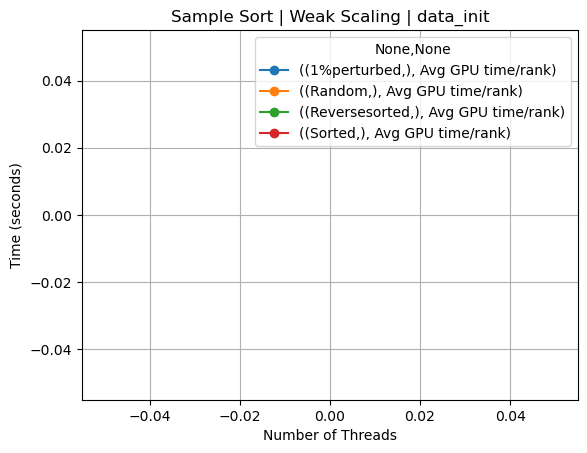

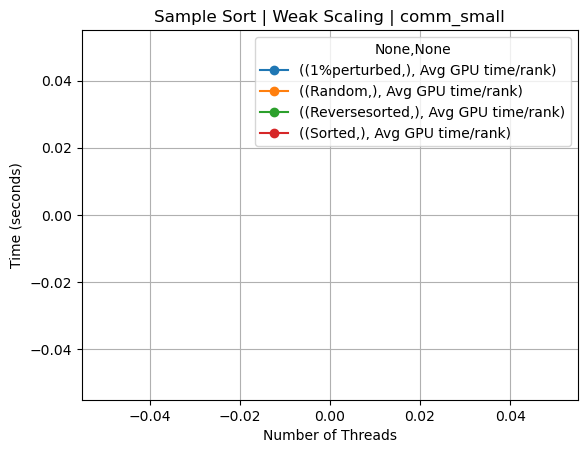

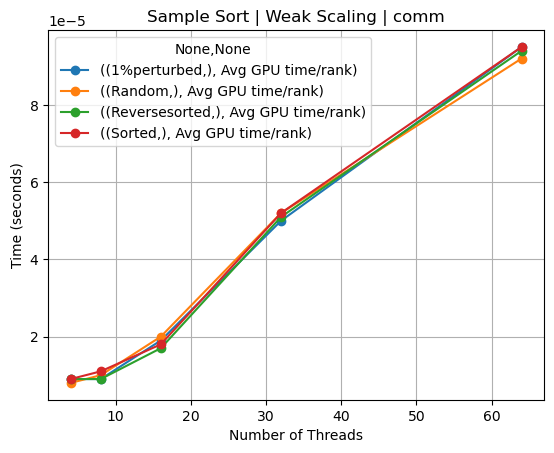

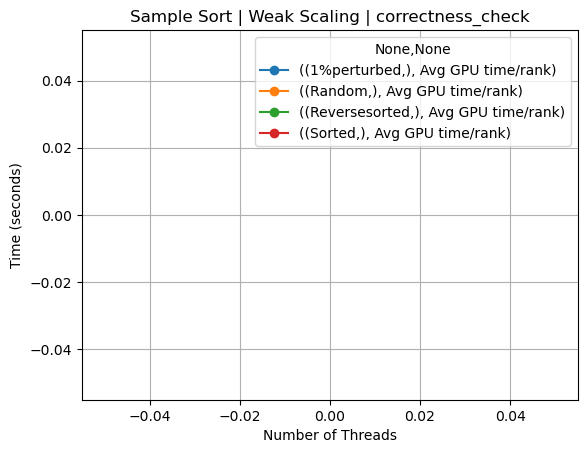

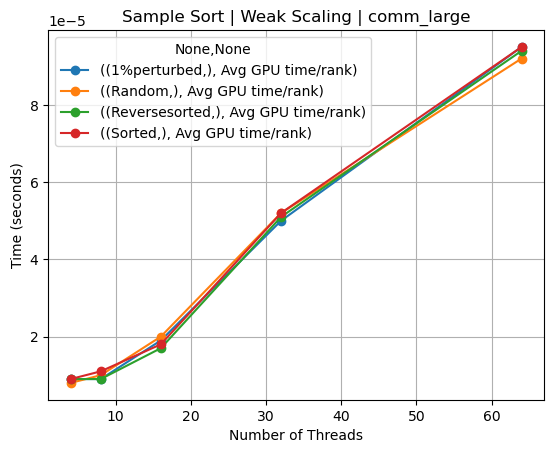

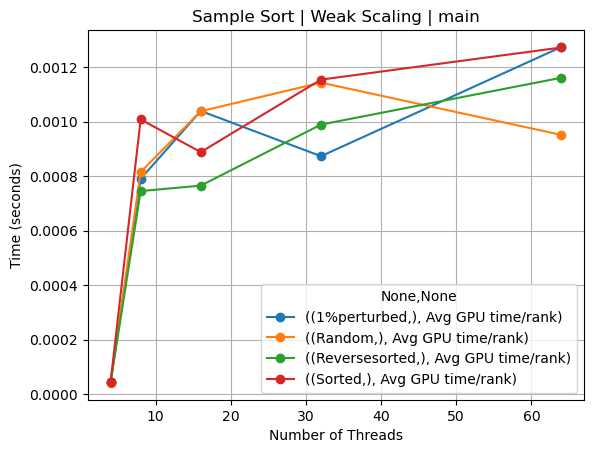

In [44]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title="Sample Sort | Weak Scaling | " + name,
        xlabel="Number of Threads",
        ylabel="Time (seconds)",
        # set to False 
        loglog=False
    )

In [29]:
        temp_df = ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == 65536 and col[1] == "Avg GPU time/rank"]].loc[name]
        temp_df = temp_df.iloc[0]/temp_df

In [30]:
# how to get input_sizes?
# speed up
input_sizes = set(tk.metadata["InputSize"])
for name in function_names:
    for size in input_sizes:
        temp_df = ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == 65536 and col[1] == "Avg GPU time/rank"]].loc[name]
        temp_df = temp_df.iloc[0]/temp_df

        plot_pandas (
            title = "Speed Up | " + name,
            xlabel = "Threads",
            ylabel = "Time (seconds)",
            # True or False? 
            loglog=False,
            df = temp_df
        )

TypeError: no numeric data to plot